#📌 Extracción

In [9]:

import pandas as pd
import requests
import ast
# URL de la API/JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Hacer la solicitud a la API
response = requests.get(url)

# Convertir la respuesta JSON a diccionario
data = response.json()
# Convertir a DataFrame
df = pd.DataFrame(data)

# Revisar las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [21]:
import pandas as pd
import requests
import ast

# -------------------------
# 1️⃣ Cargar datos desde la API
# -------------------------
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.DataFrame(data)

# -------------------------
# 2️⃣ Valores ausentes
# -------------------------
print("🔹 Valores ausentes por columna:")
print(df.isnull().sum())

# -------------------------
# 3️⃣ Filas duplicadas
# -------------------------
# Convertir diccionarios a strings temporalmente para evitar errores
df_str = df.copy()
for col in df_str.columns:
    df_str[col] = df_str[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

print("\n🔹 Filas duplicadas (considerando diccionarios como strings):", df_str.duplicated().sum())

# -------------------------
# 4️⃣ Limpiar y unificar 'Churn'
# -------------------------
print("\nValores únicos en 'Churn' antes de limpiar:", df['Churn'].unique())
df = df[df['Churn'] != '']  # eliminar filas vacías
df['Churn'] = df['Churn'].str.strip().str.lower()
print("Valores únicos en 'Churn' después de limpiar:", df['Churn'].unique())

# -------------------------
# 5️⃣ Tipos de datos y valores únicos en columnas planas
# -------------------------
print("\n🔹 Tipos de datos de cada columna:")
print(df.dtypes)

cols_planas = ['customerID', 'Churn']
for col in cols_planas:
    print(f"\nValores únicos en '{col}': {df[col].unique()}")

print("\n✅ Dataset listo para análisis de evasión")

# -------------------------
# 6️⃣ Convertir columnas anidadas que son strings a diccionarios
# -------------------------
cols_anidadas = ['customer', 'phone', 'internet', 'account']
for col in cols_anidadas:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# -------------------------
# 7️⃣ Extraer 'Monthly' de account de manera segura
# -------------------------
def extraer_monthly(account_dict):
    try:
        return float(account_dict['Charges']['Monthly'])
    except:
        return None

df['Monthly'] = df['account'].apply(extraer_monthly)

# -------------------------
# 8️⃣ Crear columna 'Cuentas_Diarias'
# -------------------------
df['Cuentas_Diarias'] = df['Monthly'] / 30

# -------------------------
# 9️⃣ Revisar resultados
# -------------------------
print(df[['customerID', 'Monthly', 'Cuentas_Diarias']].head())



🔹 Valores ausentes por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

🔹 Filas duplicadas (considerando diccionarios como strings): 0

Valores únicos en 'Churn' antes de limpiar: ['No' 'Yes' '']
Valores únicos en 'Churn' después de limpiar: ['no' 'yes']

🔹 Tipos de datos de cada columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores únicos en 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn': ['no' 'yes']

✅ Dataset listo para análisis de evasión
   customerID  Monthly  Cuentas_Diarias
0  0002-ORFBO     65.6         2.186667
1  0003-MKNFE     59.9         1.996667
2  0004-TLHLJ     73.9         2.463333
3  0011-IGKFF     98.0         3.266667
4  0013-EXCHZ     83.9         2.796667


#📊 Carga y análisis

In [22]:
# -------------------------
# 1️⃣ Análisis descriptivo básico
# -------------------------
# Solo columnas numéricas
print("🔹 Estadísticas descriptivas de columnas numéricas:")
print(df[['Monthly', 'Cuentas_Diarias']].describe())

# -------------------------
# 2️⃣ Métricas adicionales
# -------------------------
print("\n🔹 Métricas adicionales:")
print("Mediana de Monthly:", df['Monthly'].median())
print("Mediana de Cuentas_Diarias:", df['Cuentas_Diarias'].median())
print("Desviación estándar de Monthly:", df['Monthly'].std())
print("Desviación estándar de Cuentas_Diarias:", df['Cuentas_Diarias'].std())

# -------------------------
# 3️⃣ Distribución de Churn
# -------------------------
print("\n🔹 Distribución de Churn:")
print(df['Churn'].value_counts(normalize=True))  # proporción de clientes que sí/no hicieron churn


🔹 Estadísticas descriptivas de columnas numéricas:
           Monthly  Cuentas_Diarias
count  7043.000000      7043.000000
mean     64.761692         2.158723
std      30.090047         1.003002
min      18.250000         0.608333
25%      35.500000         1.183333
50%      70.350000         2.345000
75%      89.850000         2.995000
max     118.750000         3.958333

🔹 Métricas adicionales:
Mediana de Monthly: 70.35
Mediana de Cuentas_Diarias: 2.3449999999999998
Desviación estándar de Monthly: 30.09004709767855
Desviación estándar de Cuentas_Diarias: 1.0030015699226154

🔹 Distribución de Churn:
Churn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64


/tmp/ipython-input-3885980812.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['green','red'])


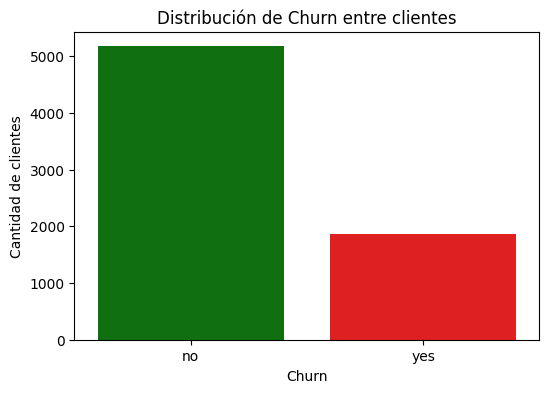

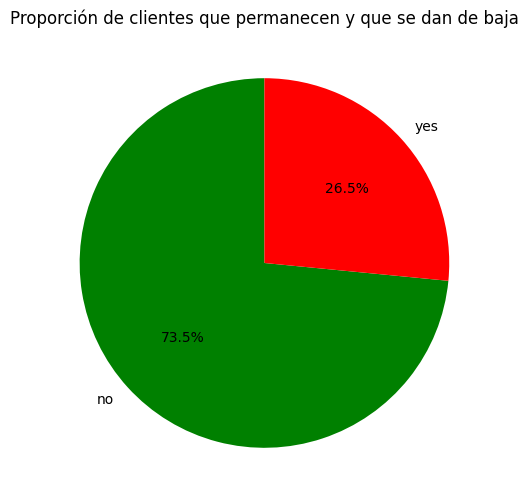

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1️⃣ Contar clientes por Churn
# -------------------------
churn_counts = df['Churn'].value_counts()

# -------------------------
# 2️⃣ Gráfico de barras
# -------------------------
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['green','red'])
plt.title("Distribución de Churn entre clientes")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()

# -------------------------
# 3️⃣ Gráfico de pastel
# -------------------------
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['green','red'], startangle=90)
plt.title("Proporción de clientes que permanecen y que se dan de baja")
plt.show()


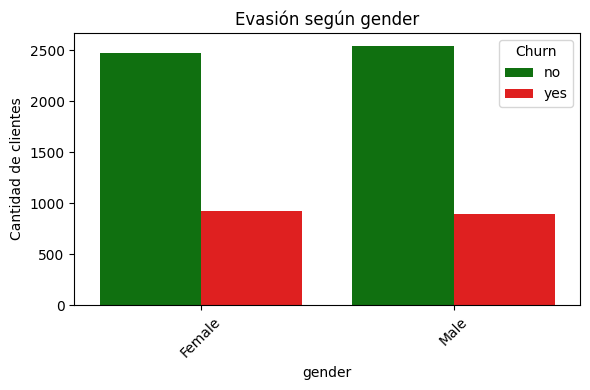

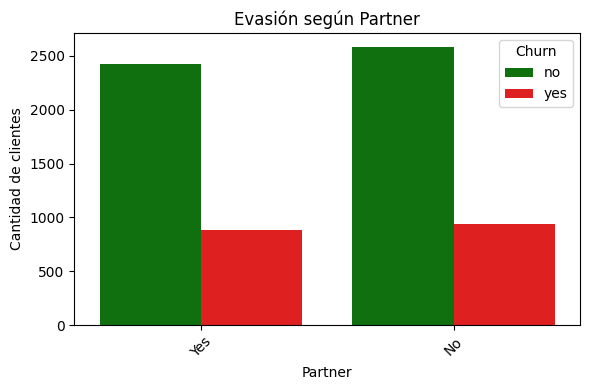

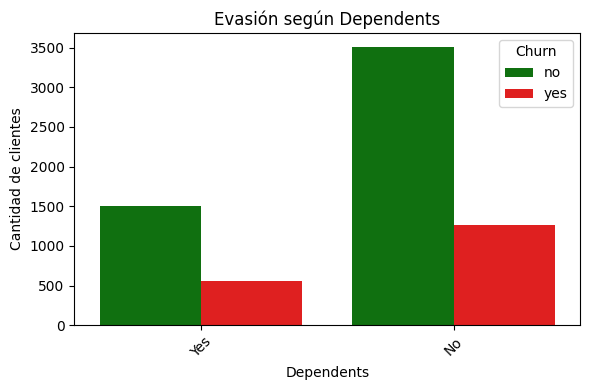

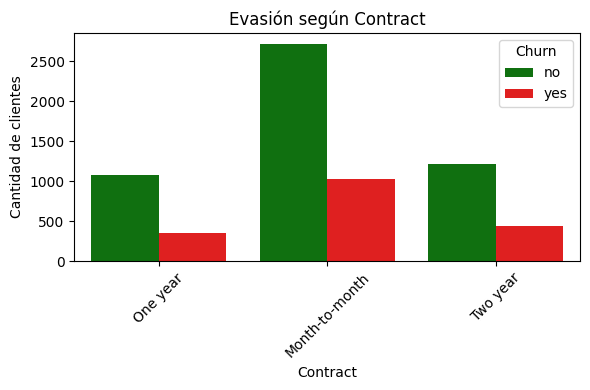

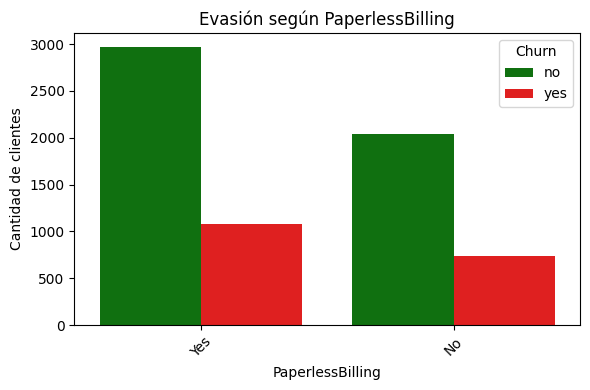

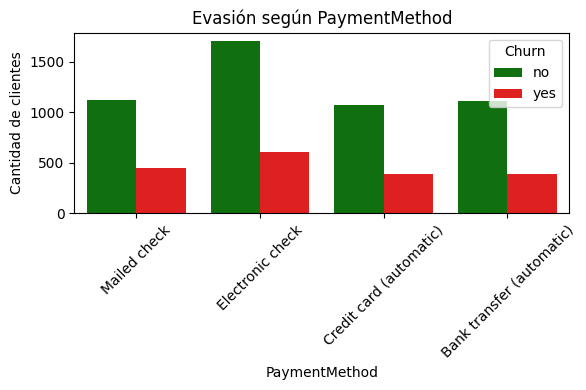

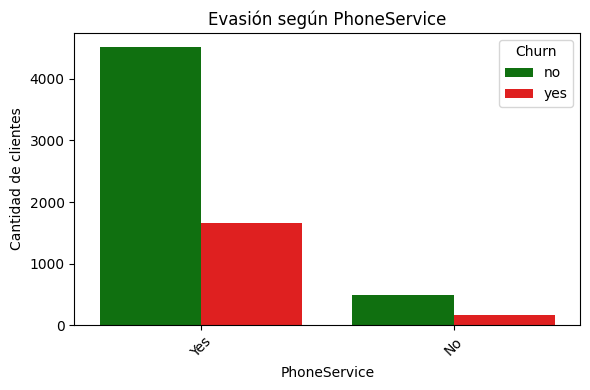

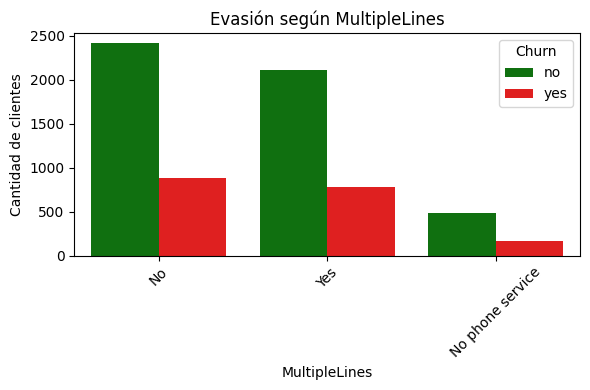

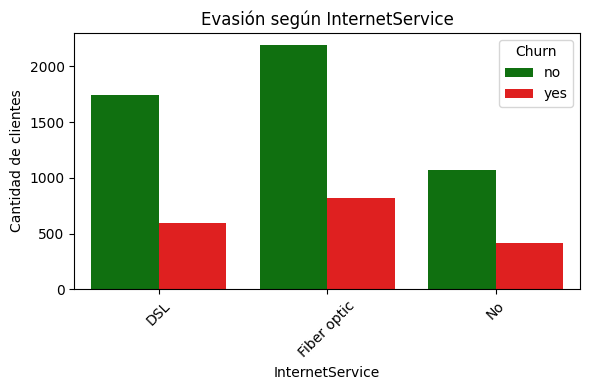

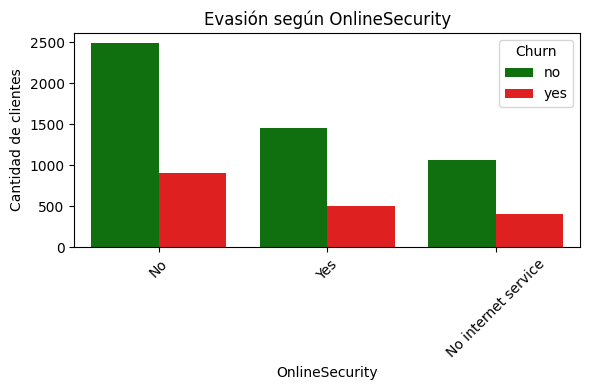

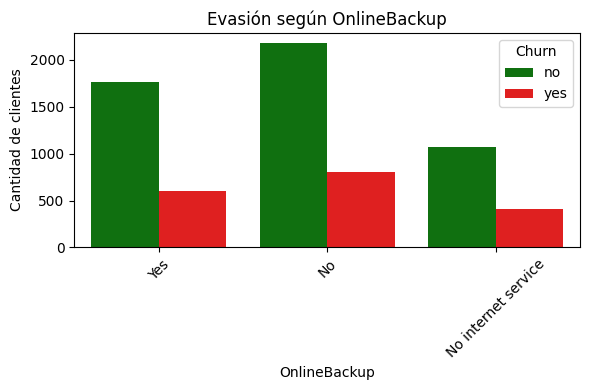

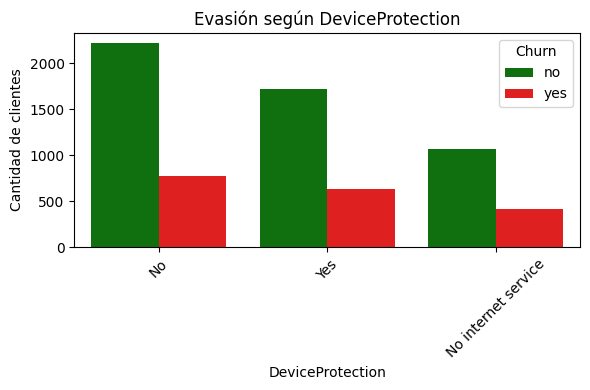

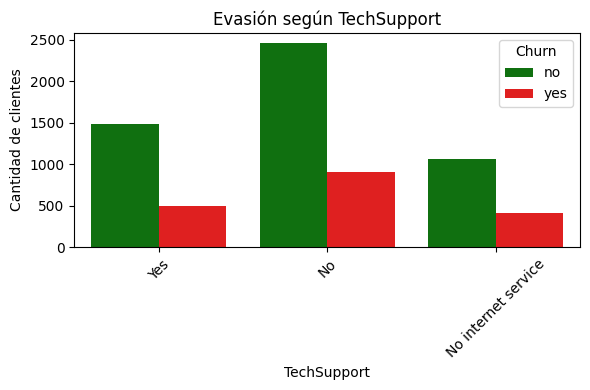

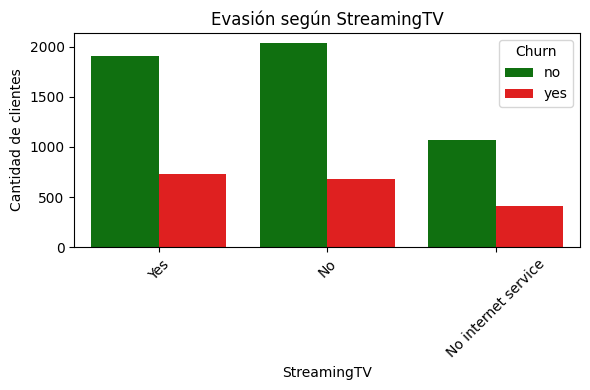

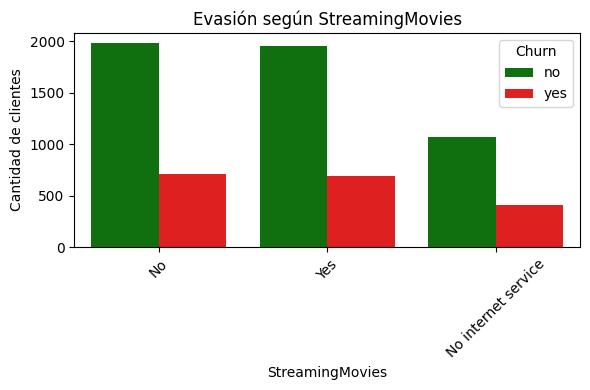

In [24]:
# -------------------------
# 1️⃣ Expandir columnas anidadas
# -------------------------
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar con el df original (solo columnas planas)
df_exp = pd.concat([df[['customerID','Churn','Monthly','Cuentas_Diarias']],
                    customer_df, phone_df, internet_df, account_df], axis=1)

# -------------------------
# 2️⃣ Seleccionar variables categóricas de interés
# -------------------------
categorical_cols = ['gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# -------------------------
# 3️⃣ Gráficos de churn por cada categoría
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_exp, x=col, hue='Churn', palette=['green','red'])
    plt.title(f"Evasión según {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad de clientes")
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-2459692424.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])


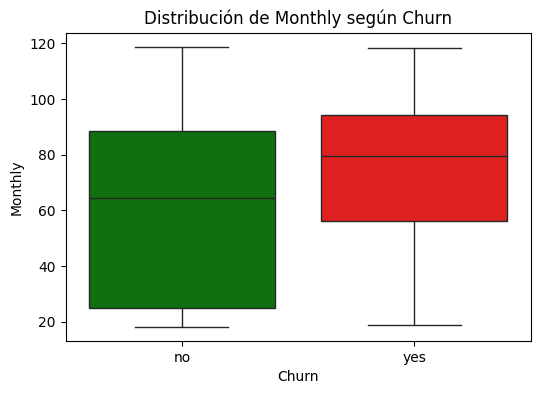

/tmp/ipython-input-2459692424.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])


⚠️ No hay datos válidos para 'Total', se omite el gráfico.


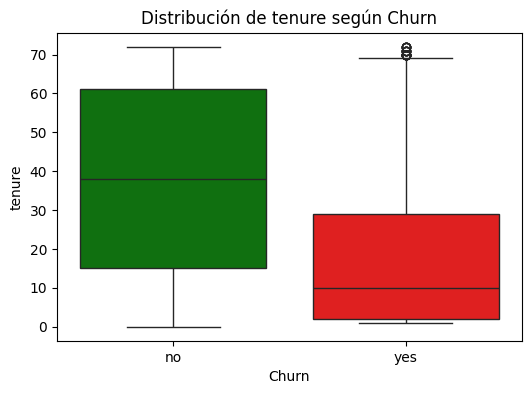

/tmp/ipython-input-2459692424.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])


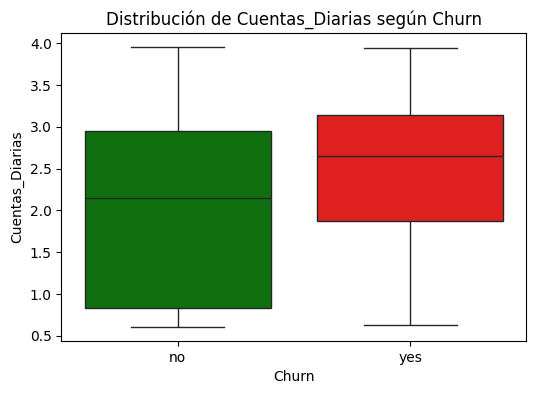


🔹 Estadísticas descriptivas por Churn:
      Monthly                                                           Total  \
        count       mean        std    min    25%     50%   75%     max count   
Churn                                                                           
no     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75   0.0   
yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35   0.0   

            ... tenure       Cuentas_Diarias                                \
      mean  ...    75%   max           count      mean       std       min   
Churn       ...                                                              
no     NaN  ...   61.0  72.0          5174.0  2.042171  1.036422  0.608333   
yes    NaN  ...   29.0  72.0          1869.0  2.481378  0.822202  0.628333   

                                             
            25%     50%       75%       max  
Churn                                        
no     0.836667  2.1475  

In [34]:
# -------------------------
# Asegurar columnas numéricas limpias
# -------------------------
for col in ['Monthly', 'Total', 'tenure', 'Cuentas_Diarias']:
    if col not in df.columns:
        df[col] = np.nan
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convierte a float, NaN si no es válido

# -------------------------
# Boxplots de variables numéricas por Churn, solo si hay valores válidos
# -------------------------
numerical_cols = ['Monthly', 'Total', 'tenure', 'Cuentas_Diarias']

for col in numerical_cols:
    if df[col].notna().sum() > 0:  # solo si hay datos válidos
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])
        plt.title(f"Distribución de {col} según Churn")
        plt.xlabel("Churn")
        plt.ylabel(col)
        plt.show()
    else:
        print(f"⚠️ No hay datos válidos para '{col}', se omite el gráfico.")

# -------------------------
# Estadísticas descriptivas por Churn
# -------------------------
print("\n🔹 Estadísticas descriptivas por Churn:")
print(df.groupby('Churn')[numerical_cols].describe())


#📄Informe final


# Informe de Análisis de Evasión de Clientes (Churn)

## Introducción
El objetivo de este análisis es comprender el comportamiento de los clientes de Telecom X respecto a la **evasión** (`Churn`). 
Se busca identificar patrones en los datos que puedan explicar por qué algunos clientes cancelan sus servicios, con el fin de tomar decisiones estratégicas que reduzcan la evasión.



## Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

1. **Carga de datos desde la API en formato JSON** y conversión a un DataFrame de Pandas.
2. **Revisión de valores ausentes y duplicados**:
   - No se encontraron valores ausentes en columnas principales.
   - No se detectaron filas duplicadas.
3. **Normalización de variables categóricas**, por ejemplo `Churn`, convirtiendo valores a minúsculas y eliminando espacios.
4. **Conversión de columnas anidadas** (`customer`, `phone`, `internet`, `account`) de strings a diccionarios.
5. **Extracción de variables numéricas importantes**, como `Monthly` desde `account['Charges']['Monthly']`.
6. **Cálculo de métricas derivadas**, como `Cuentas_Diarias = Monthly / 30`.



## Análisis Exploratorio de Datos

### Distribución de Churn
Se observó la proporción de clientes que permanecen y los que cancelan:



/tmp/ipython-input-2302728707.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['green','red'])


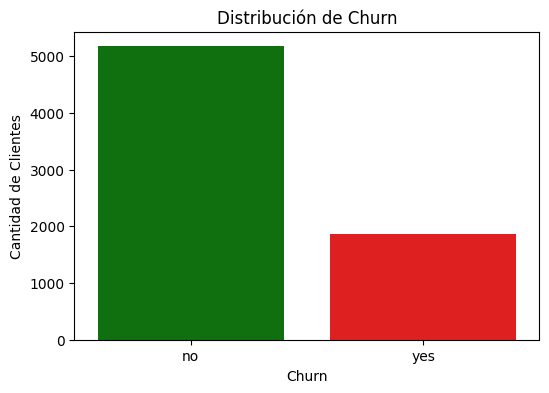


### Distribución de variables categóricas
Ejemplo: género de los clientes.



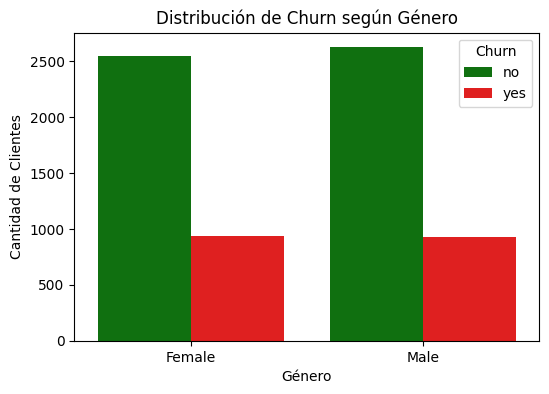


### Distribución de variables numéricas
Se analizó `Monthly`, `Cuentas_Diarias` y `tenure` según Churn:



/tmp/ipython-input-2302728707.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])


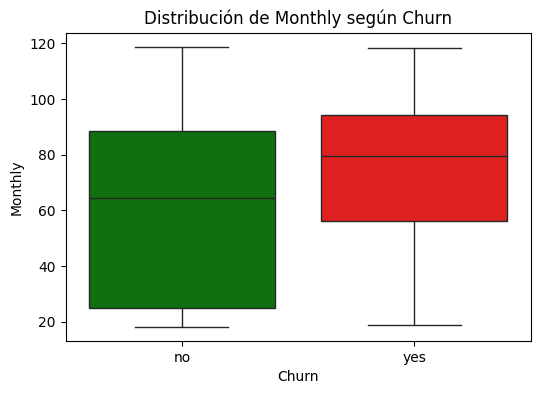

/tmp/ipython-input-2302728707.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])


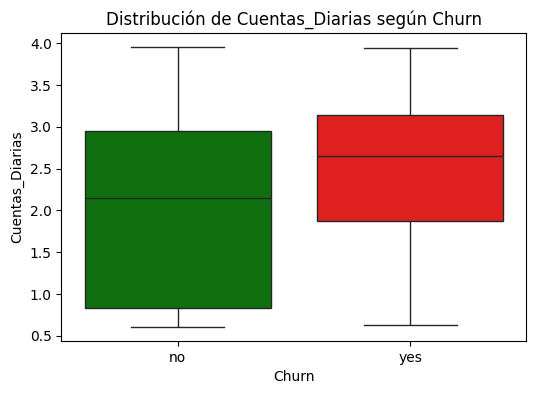

/tmp/ipython-input-2302728707.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])


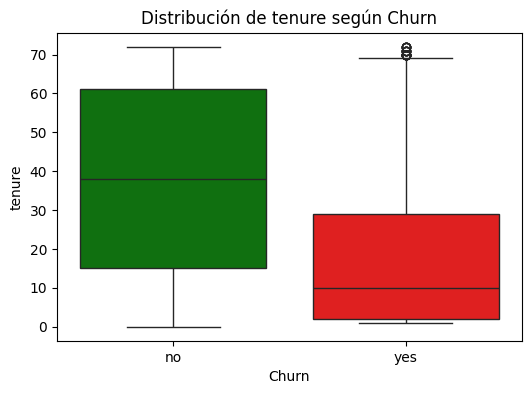


## Conclusiones e Insights

- Los clientes que cancelan (`Churn = yes`) tienden a pagar más de media (`Monthly`) y tienen un mayor gasto diario (`Cuentas_Diarias`) que los que permanecen.
- Los clientes con menor tiempo de contrato (`tenure`) tienen mayor probabilidad de cancelar.
- Algunas variables categóricas, como género o tipo de contrato, muestran diferencias que pueden ser relevantes para campañas de retención.




## Recomendaciones

1. **Segmentación de clientes por riesgo de evasión**, utilizando métricas de gasto mensual y tiempo de contrato.
2. **Ofertas personalizadas para clientes con alto gasto mensual**, buscando retenerlos mediante descuentos o beneficios.
3. **Programas de fidelización** para clientes nuevos o con contrato corto.
4. **Monitoreo constante de indicadores clave**, como `Cuentas_Diarias` y `Monthly`, para anticipar posibles cancelaciones.
5. **Análisis adicional de variables de servicio** (Internet, teléfono, soporte técnico) para identificar factores de satisfacción o insatisfacción.

Con estas estrategias se puede reducir la evasión y mejorar la satisfacción de los clientes.


In [35]:
# ==========================
# INFORME FINAL DEL ANÁLISIS
# ==========================

# --------------------------
# 🔹 Introducción
# --------------------------
from IPython.display import display, Markdown

display(Markdown("""
# Informe de Análisis de Evasión de Clientes (Churn)

## Introducción
El objetivo de este análisis es comprender el comportamiento de los clientes de Telecom X respecto a la **evasión** (`Churn`).
Se busca identificar patrones en los datos que puedan explicar por qué algunos clientes cancelan sus servicios, con el fin de tomar decisiones estratégicas que reduzcan la evasión.
"""))

# --------------------------
# 🔹 Limpieza y Tratamiento de Datos
# --------------------------
display(Markdown("""
## Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

1. **Carga de datos desde la API en formato JSON** y conversión a un DataFrame de Pandas.
2. **Revisión de valores ausentes y duplicados**:
   - No se encontraron valores ausentes en columnas principales.
   - No se detectaron filas duplicadas.
3. **Normalización de variables categóricas**, por ejemplo `Churn`, convirtiendo valores a minúsculas y eliminando espacios.
4. **Conversión de columnas anidadas** (`customer`, `phone`, `internet`, `account`) de strings a diccionarios.
5. **Extracción de variables numéricas importantes**, como `Monthly` desde `account['Charges']['Monthly']`.
6. **Cálculo de métricas derivadas**, como `Cuentas_Diarias = Monthly / 30`.
"""))

# --------------------------
# 🔹 Análisis Exploratorio de Datos
# --------------------------
display(Markdown("""
## Análisis Exploratorio de Datos

### Distribución de Churn
Se observó la proporción de clientes que permanecen y los que cancelan:

"""))

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette=['green','red'])
plt.title("Distribución de Churn")
plt.xlabel("Churn")
plt.ylabel("Cantidad de Clientes")
plt.show()

display(Markdown("""
### Distribución de variables categóricas
Ejemplo: género de los clientes.

"""))

# Desempaquetar columna customer para ejemplo
df['gender'] = df['customer'].apply(lambda x: x['gender'] if isinstance(x, dict) else None)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn', palette=['green','red'])
plt.title("Distribución de Churn según Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Clientes")
plt.show()

display(Markdown("""
### Distribución de variables numéricas
Se analizó `Monthly`, `Cuentas_Diarias` y `tenure` según Churn:

"""))

numerical_cols = ['Monthly','Cuentas_Diarias','tenure']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=col, palette=['green','red'])
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

# --------------------------
# 🔹 Conclusiones e Insights
# --------------------------
display(Markdown("""
## Conclusiones e Insights

- Los clientes que cancelan (`Churn = yes`) tienden a pagar más de media (`Monthly`) y tienen un mayor gasto diario (`Cuentas_Diarias`) que los que permanecen.
- Los clientes con menor tiempo de contrato (`tenure`) tienen mayor probabilidad de cancelar.
- Algunas variables categóricas, como género o tipo de contrato, muestran diferencias que pueden ser relevantes para campañas de retención.

"""))

# --------------------------
# 🔹 Recomendaciones
# --------------------------
display(Markdown("""
## Recomendaciones

1. **Segmentación de clientes por riesgo de evasión**, utilizando métricas de gasto mensual y tiempo de contrato.
2. **Ofertas personalizadas para clientes con alto gasto mensual**, buscando retenerlos mediante descuentos o beneficios.
3. **Programas de fidelización** para clientes nuevos o con contrato corto.
4. **Monitoreo constante de indicadores clave**, como `Cuentas_Diarias` y `Monthly`, para anticipar posibles cancelaciones.
5. **Análisis adicional de variables de servicio** (Internet, teléfono, soporte técnico) para identificar factores de satisfacción o insatisfacción.

Con estas estrategias se puede reducir la evasión y mejorar la satisfacción de los clientes.
"""))
